# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# load dataset
dataset_path = "bank_transactions_data_2.csv"
df = pd.read_csv(dataset_path)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39


Missing Values:
 TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Summary Statistics:
        TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max         

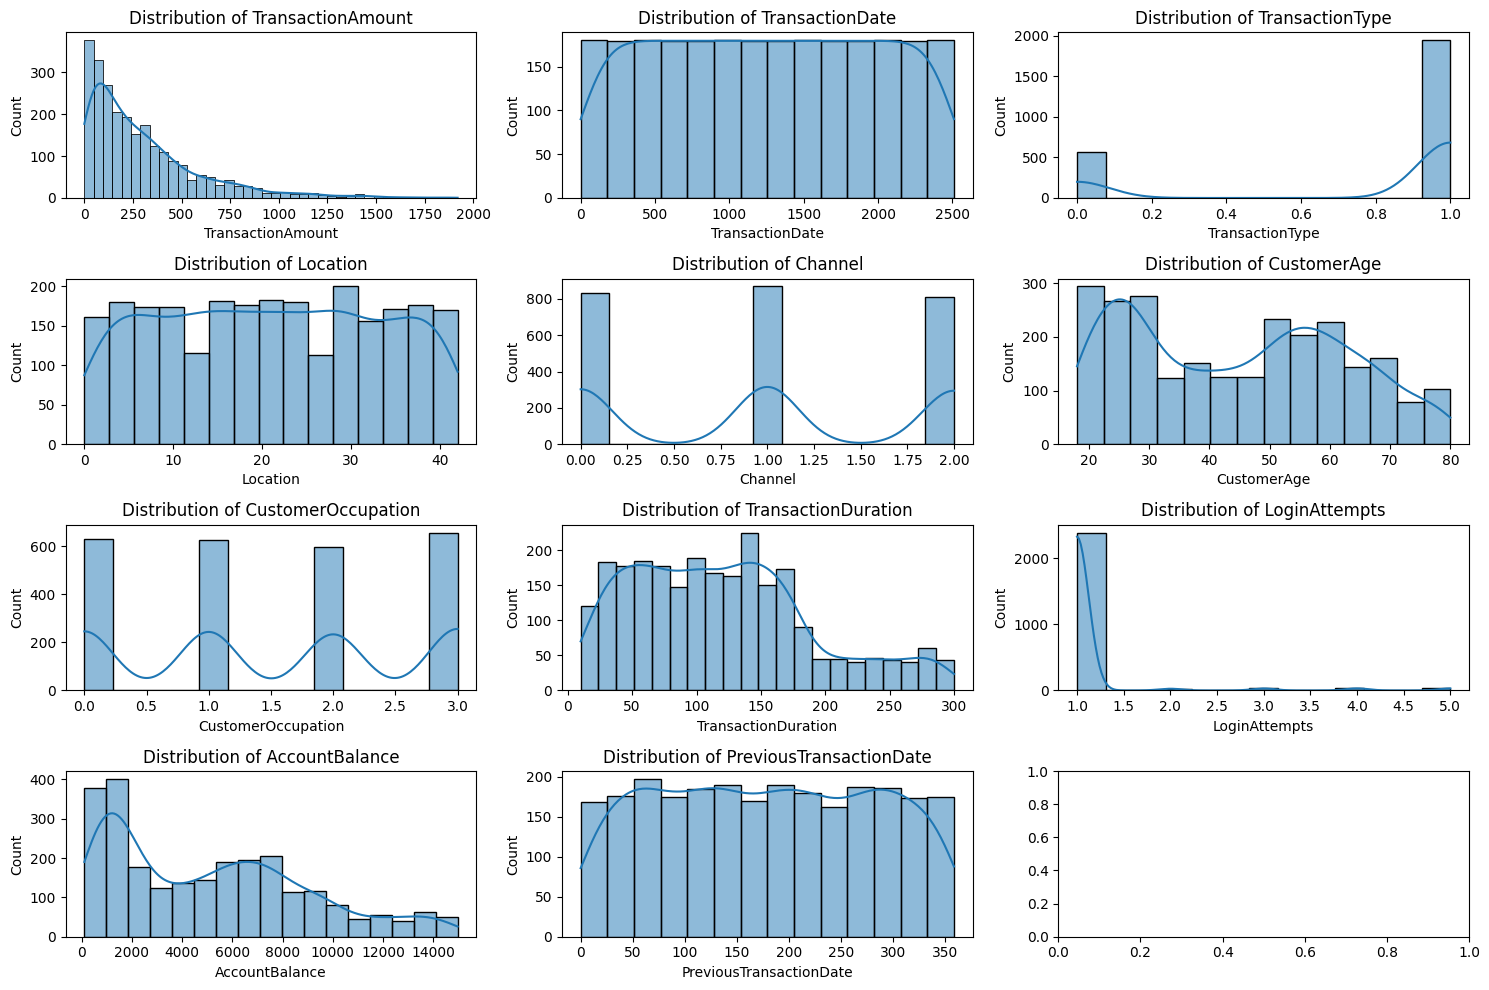

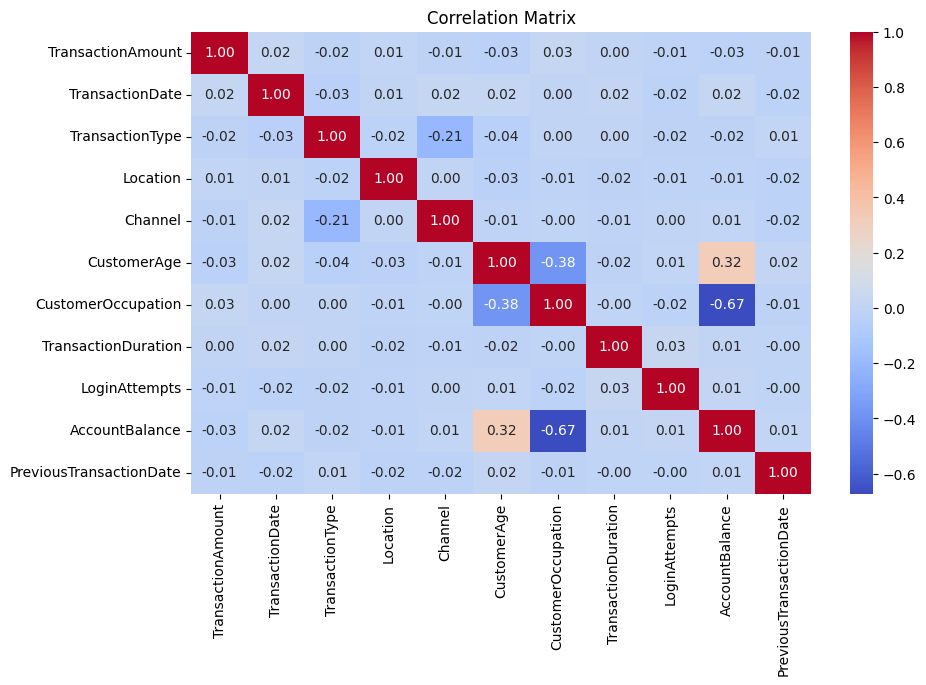

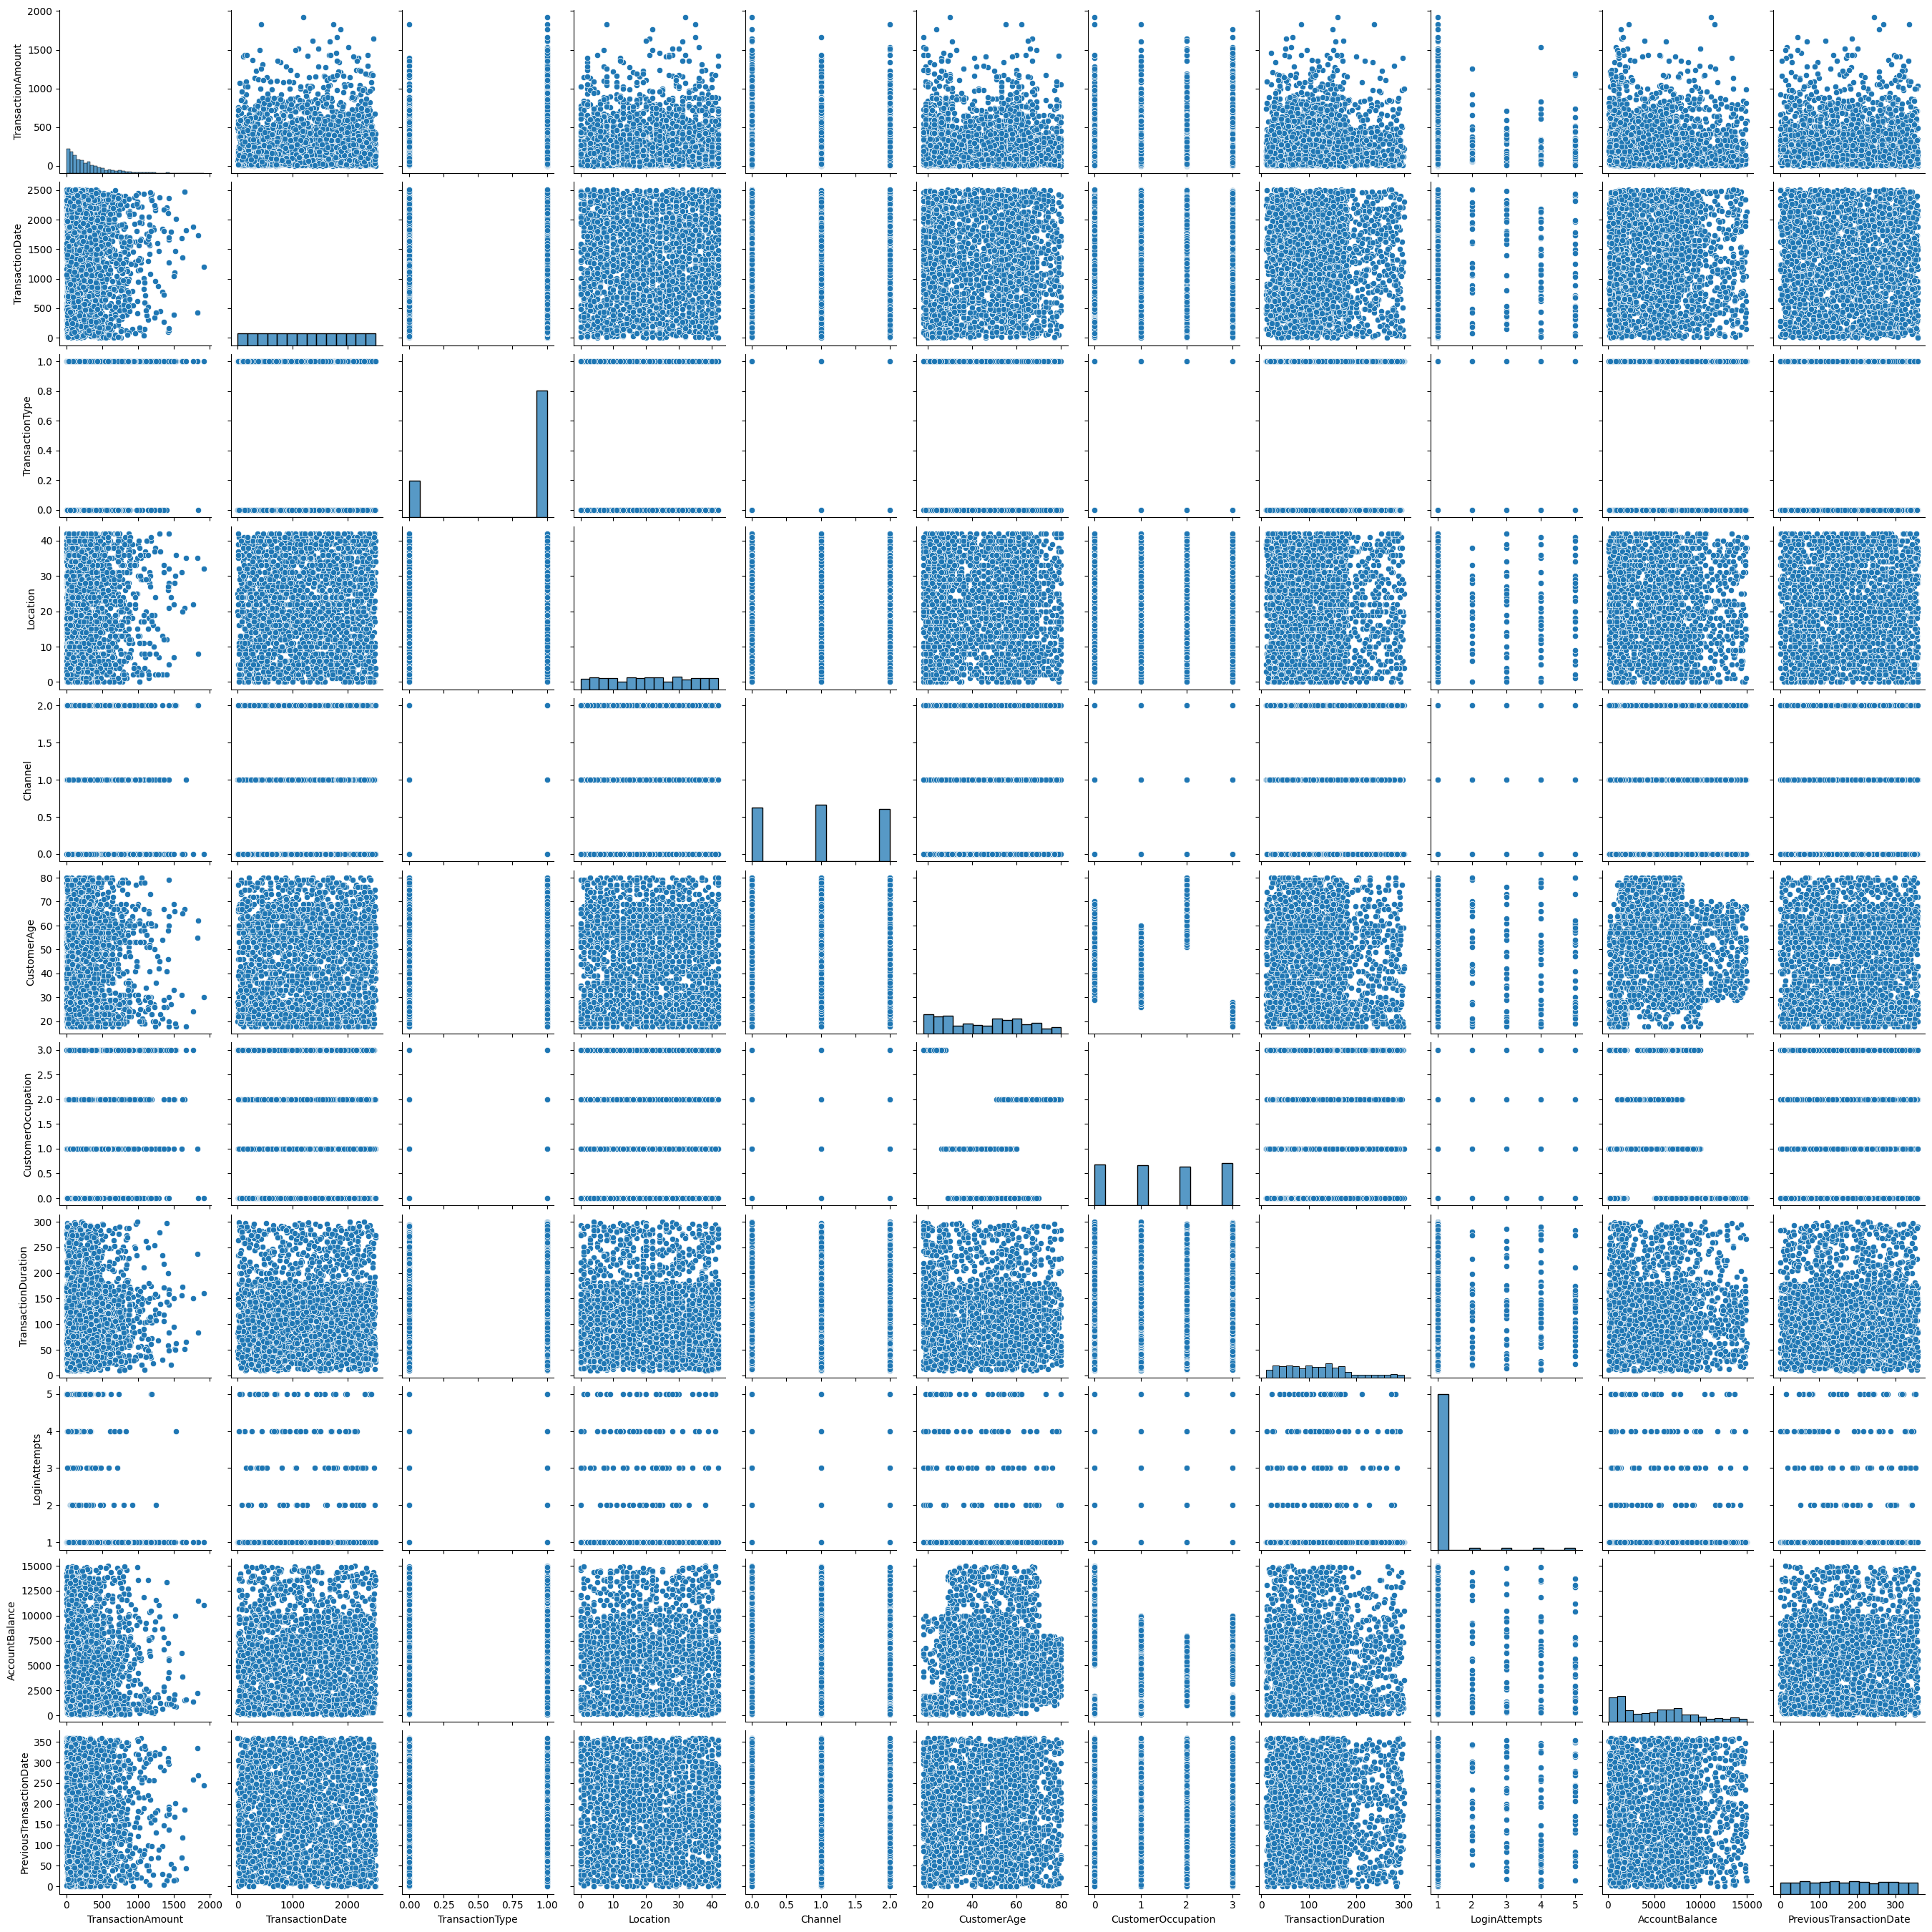

In [3]:
# === EDA: Memeriksa Struktur Data ===
print(df.info())
display(df.head())

# === Hapus kolom ID yang tidak diperlukan ===
id_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df.drop(columns=[col for col in id_columns if col in df.columns], inplace=True)


# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# === Summary Statistik ===
print("\nSummary Statistics:\n", df.describe())

# === Encode categorical columns ===
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# === Identifikasi Kolom Numerik Setelah Penghapusan ID ===
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# === Visualisasi Distribusi Variabel Numerik ===
fig, axes = plt.subplots(len(numerical_cols)//3 + 1, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# === Matriks Korelasi ===
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# === Pairplot untuk Variabel Numerik ===
sns.pairplot(df[numerical_cols])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.


Summary Statistics After Preprocessing:
        TransactionAmount  TransactionDate  TransactionType     Location  \
count        1764.000000      1764.000000           1764.0  1764.000000   
mean          250.377636      1239.916100              1.0    20.967120   
std           213.261624       727.722444              0.0    12.251572   
min             0.260000         0.000000              1.0     0.000000   
25%            77.437500       614.750000              1.0    10.000000   
50%           191.260000      1229.500000              1.0    21.000000   
75%           368.625000      1870.250000              1.0    31.000000   
max           903.190000      2511.000000              1.0    42.000000   

           Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
count  1764.000000  1764.000000         1764.000000          1764.000000   
mean      0.905329    44.352041            1.512472           118.887755   
std       0.818528    17.703655            1.133396   

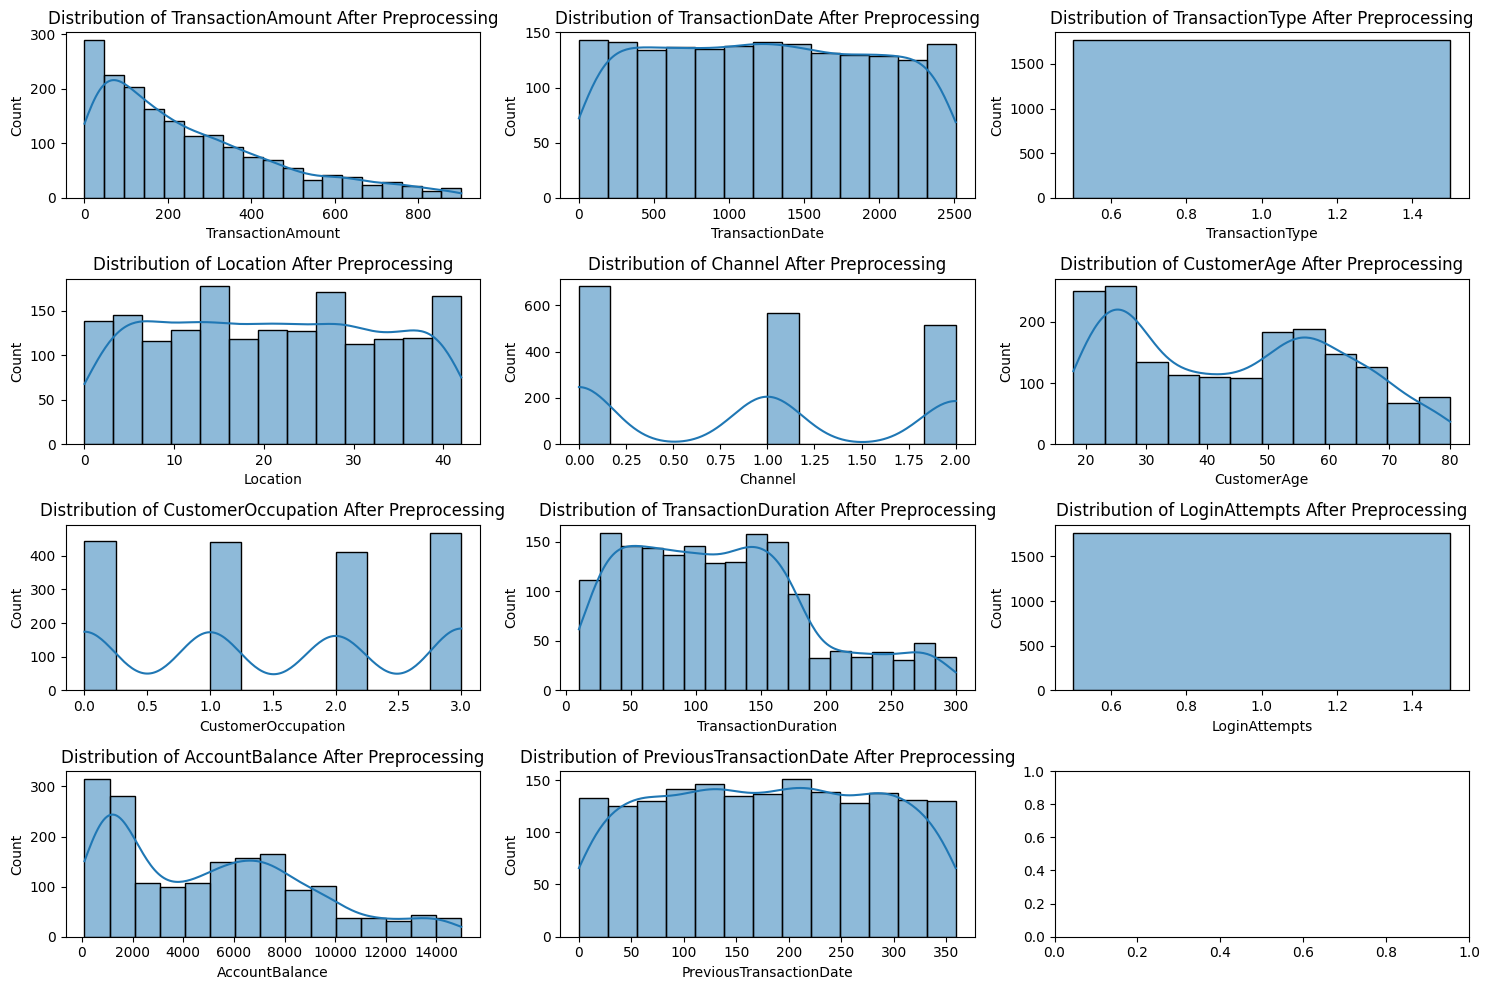

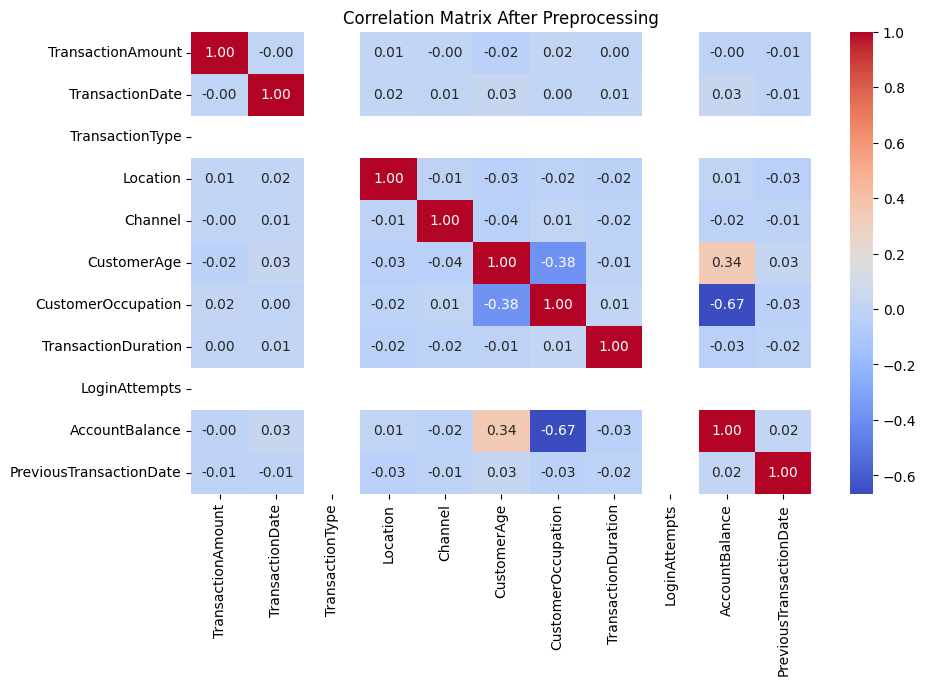

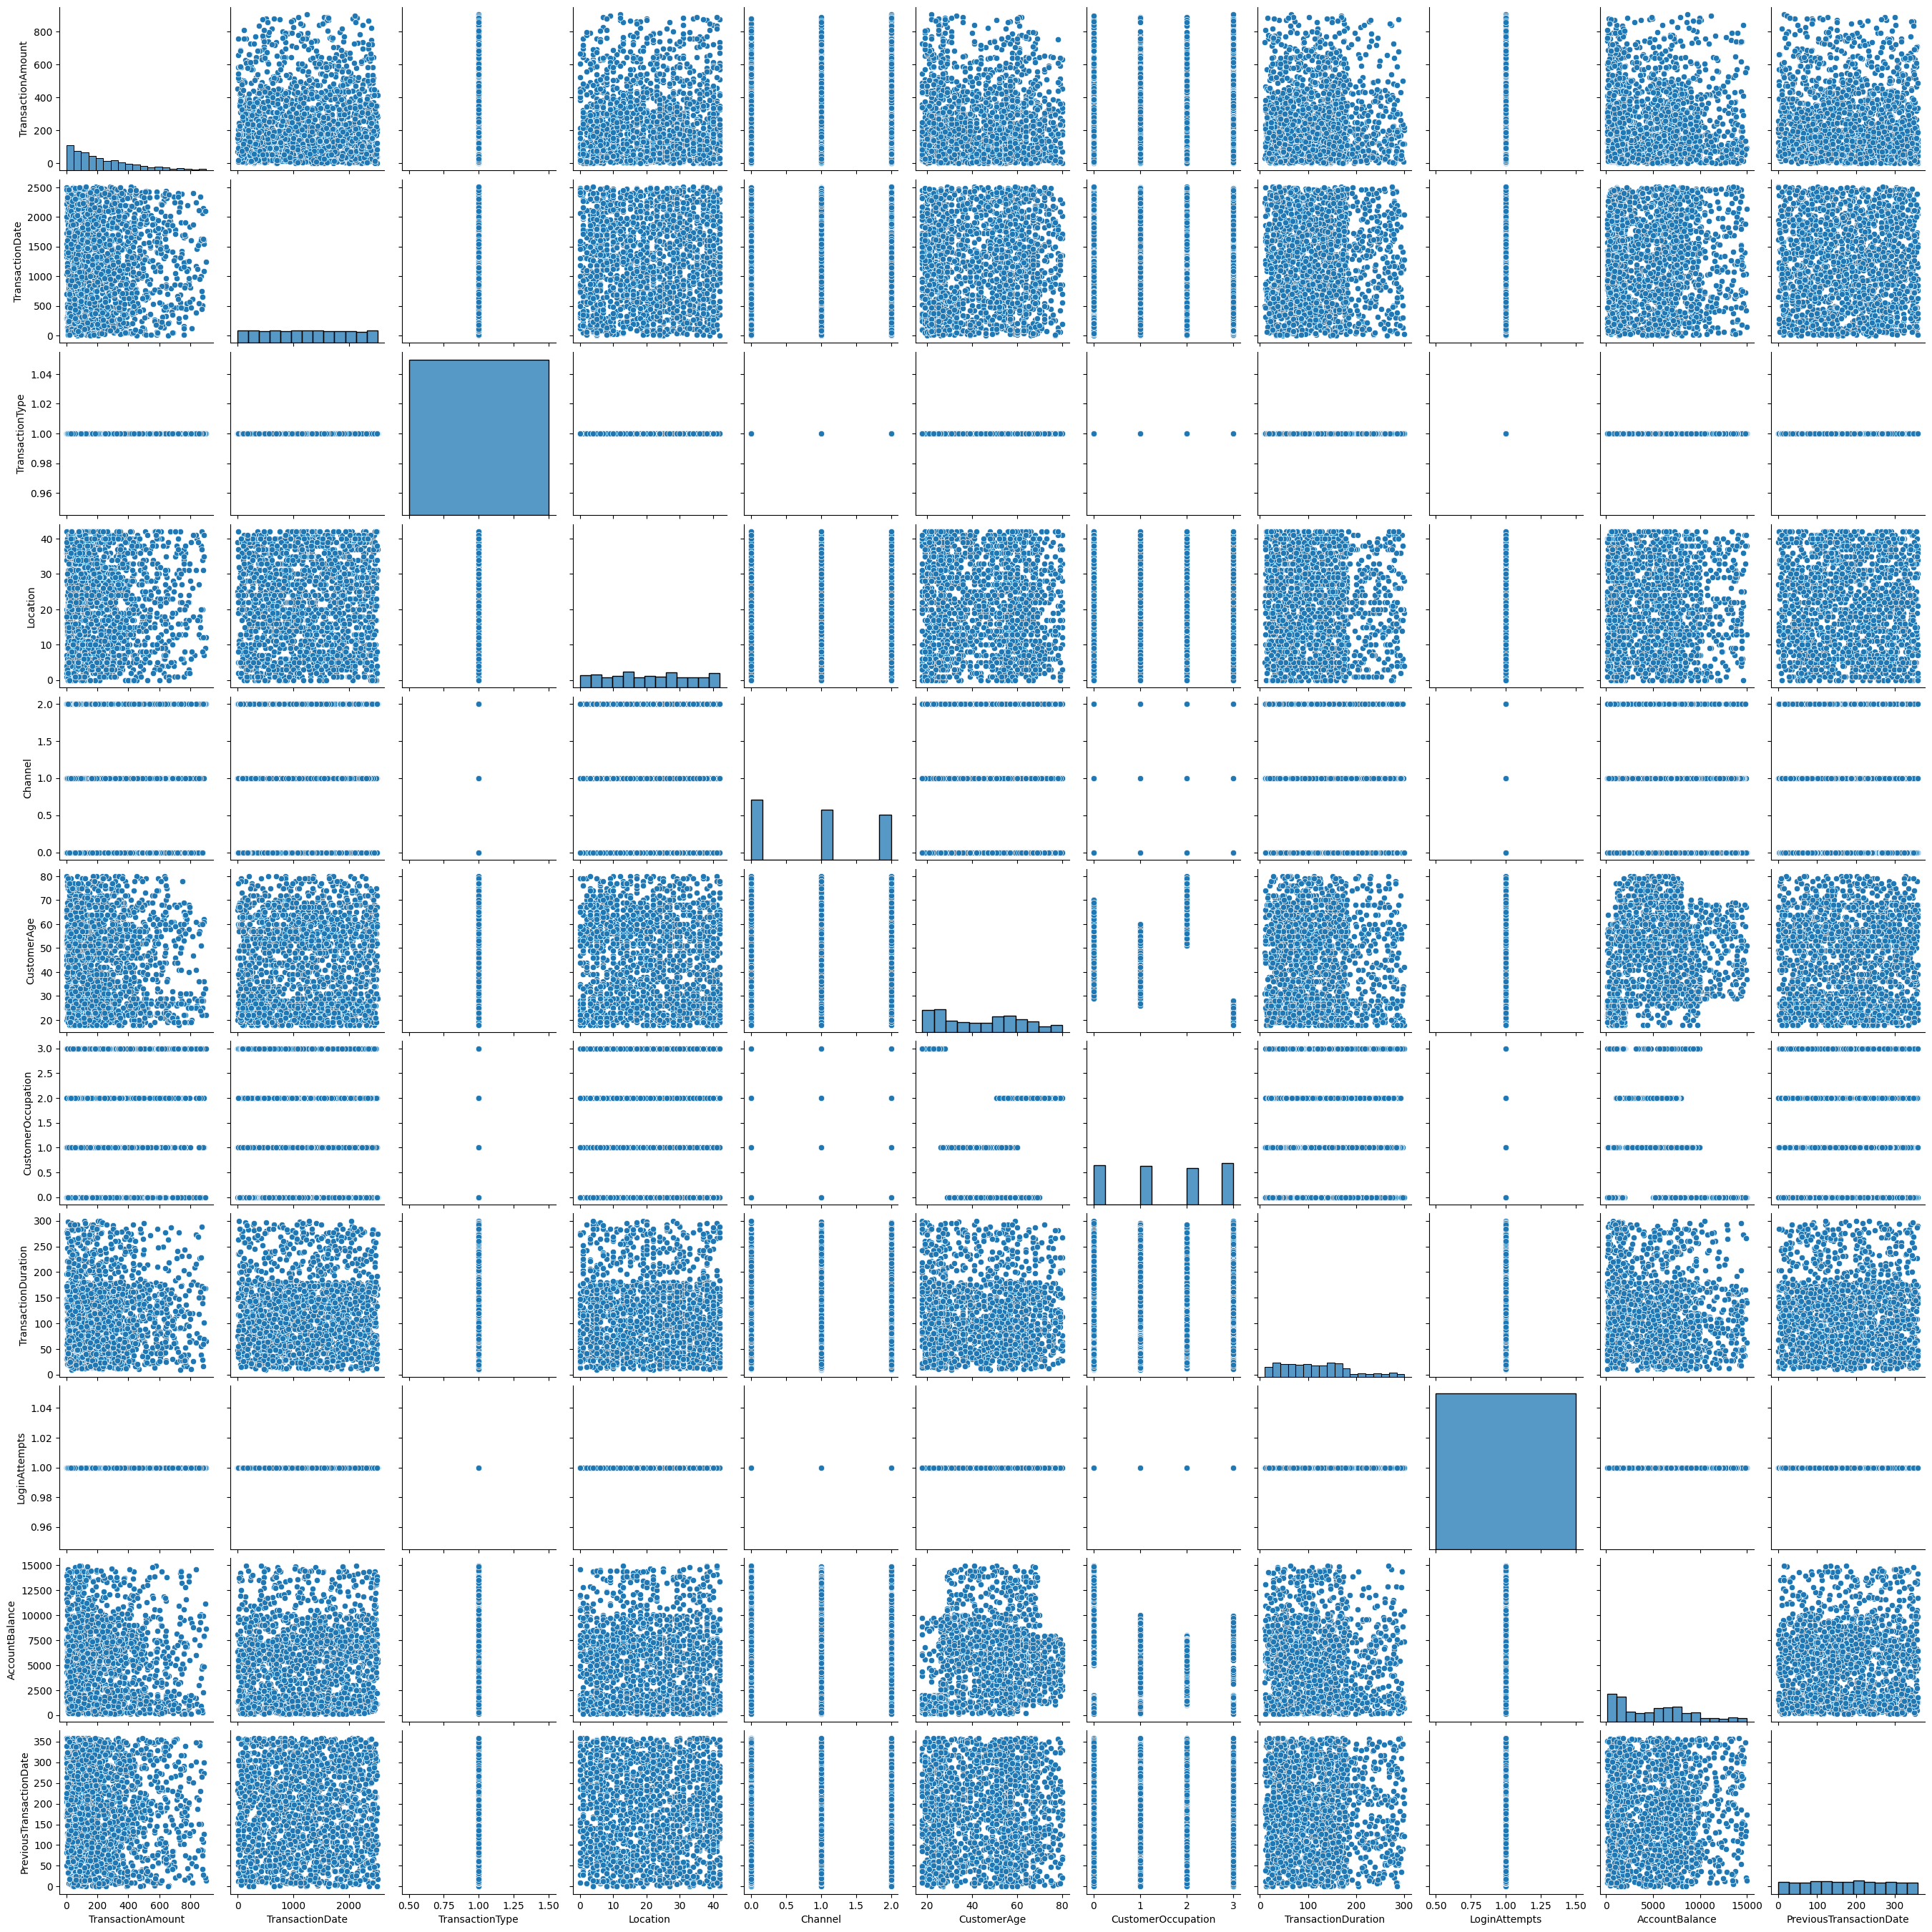

In [4]:
# === DATA PREPROCESSING ===
# Hapus missing values dan duplikasi
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df_original = df.copy()

# === Deteksi dan Hapus Outlier dengan IQR ===
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))
df = df[~outlier_condition.any(axis=1)]  # Hapus outliers

# === Normalisasi / Standardisasi Data ===
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# === Statistik Setelah Preprocessing ===
print("\nSummary Statistics After Preprocessing:\n", df.describe())

# === Visualisasi Distribusi Setelah Preprocessing ===
fig, axes = plt.subplots(len(numerical_cols)//3 + 1, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} After Preprocessing")
plt.tight_layout()
plt.show()


# === Korelasi Setelah Preprocessing ===
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix After Preprocessing")
plt.show()

# === Pairplot Setelah Preprocessing ===
sns.pairplot(df[numerical_cols])
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

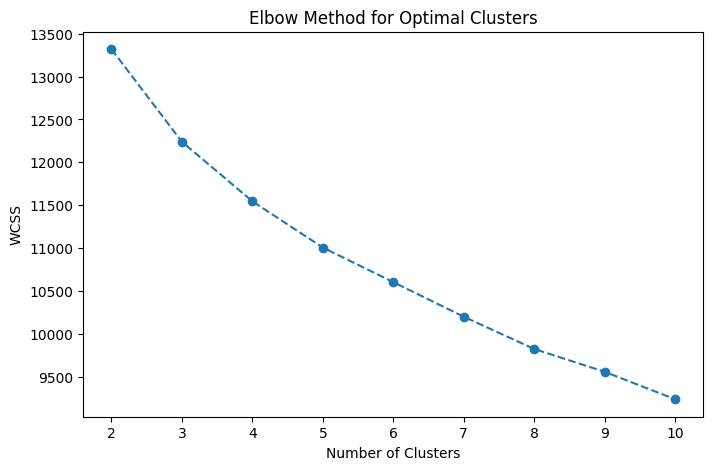

In [5]:
wcss = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

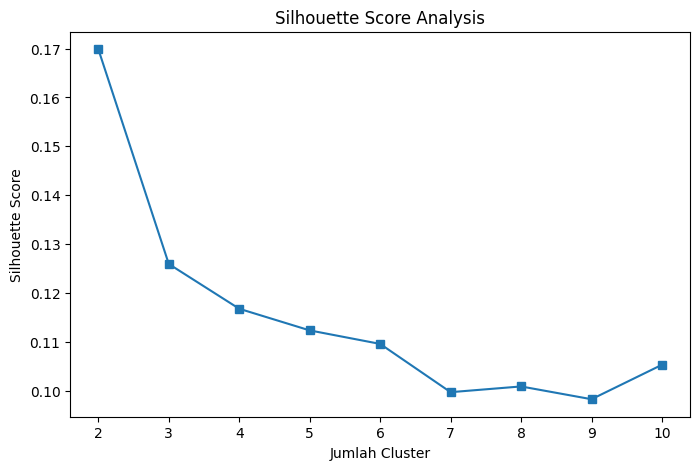

In [6]:
# Silhouette Score Analysis
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

# Train KMeans model with optimal clusters (k=4 based on results)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [7]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

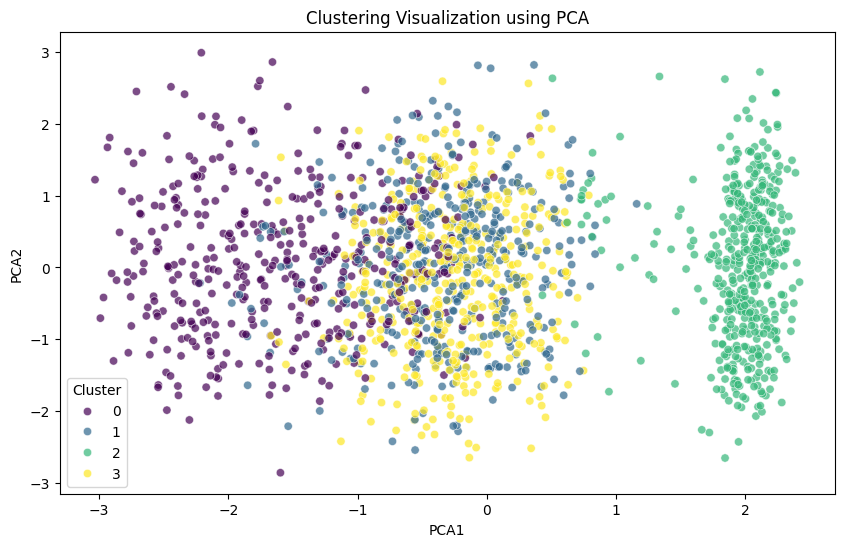

In [8]:
# PCA for 2D visualization
pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_scaled)
df['PCA1'], df['PCA2'] = df_pca[:, 0], df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title("Clustering Visualization using PCA")
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [9]:
# Inverse transform fitur kategorikal
for col in categorical_cols:
    df[col] = label_encoders[col].inverse_transform(df[col])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [10]:
# Inverse Transform standardized numerical columns
df[numerical_cols] = scaler.inverse_transform(df_scaled)

# Menggabungkan kembali data asli untuk interpretasi
df_interpretation = df_original.copy()
df_interpretation['Cluster'] = df['Cluster']

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Cluster Characteristics Summary:
          TransactionAmount  TransactionDate  TransactionType  Location  \
Cluster                                                                  
0.0                 244.91          1253.66              1.0     22.45   
1.0                 251.06          1212.73              1.0     20.32   
2.0                 258.34          1234.60              1.0     20.91   
3.0                 246.64          1257.31              1.0     20.23   

         Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
Cluster                                                                  
0.0         0.69        46.89                0.24               126.33   
1.0         1.78        49.76                1.07               109.05   
2.0         0.91        23.15                2.99               120.45   
3.0         0.30        58.98                1.58               119.27   

         LoginAttempts  AccountBalance  PreviousTransactionDate  
Cluster  

C:\Users\Asus\AppData\Local\Temp\ipykernel_7196\3044150160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_interpretation, palette="Set2")


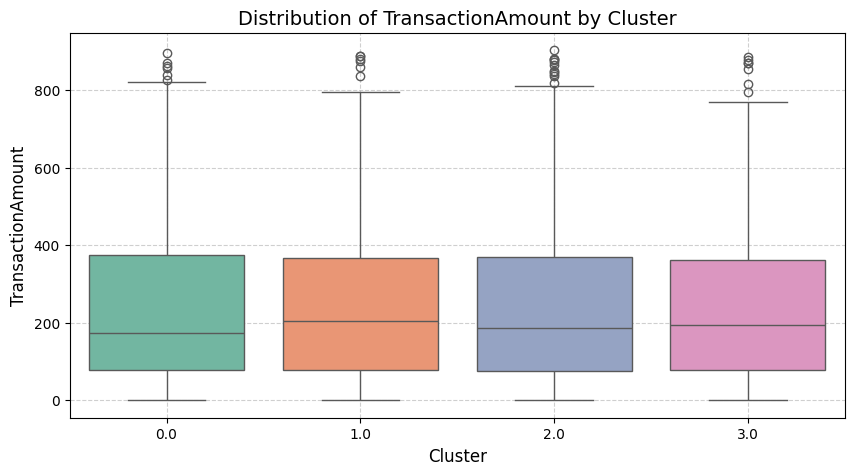

C:\Users\Asus\AppData\Local\Temp\ipykernel_7196\3044150160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_interpretation, palette="Set2")


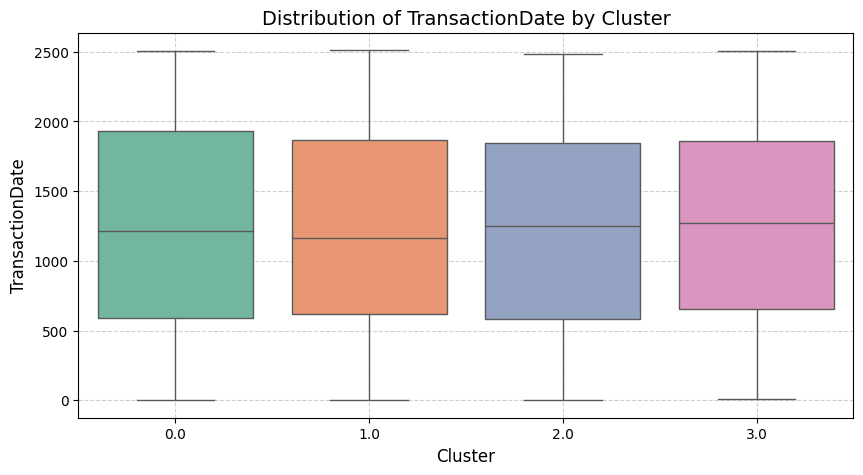

C:\Users\Asus\AppData\Local\Temp\ipykernel_7196\3044150160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_interpretation, palette="Set2")


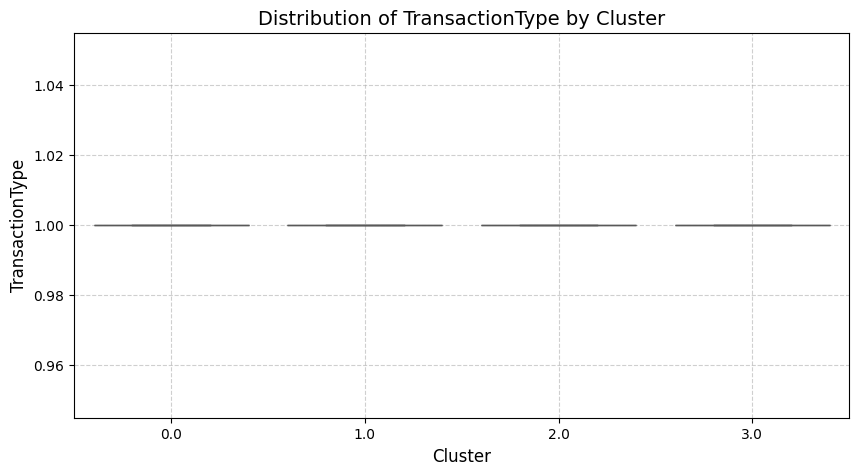

C:\Users\Asus\AppData\Local\Temp\ipykernel_7196\3044150160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_interpretation, palette="Set2")


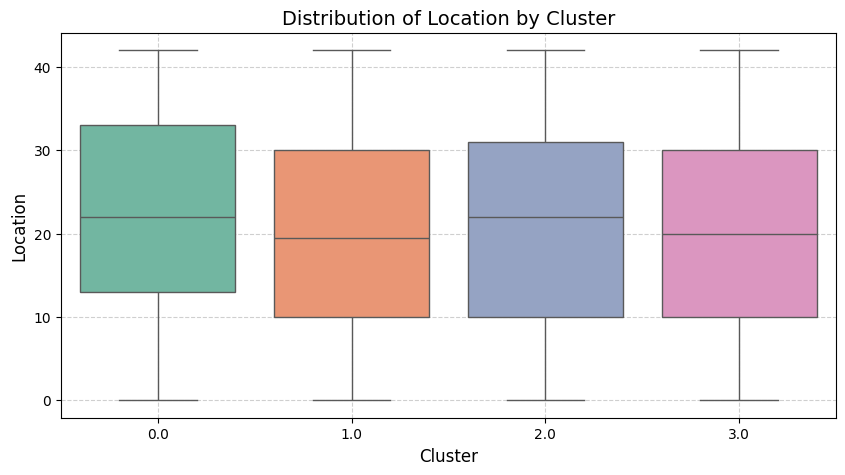

C:\Users\Asus\AppData\Local\Temp\ipykernel_7196\3044150160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_interpretation, palette="Set2")


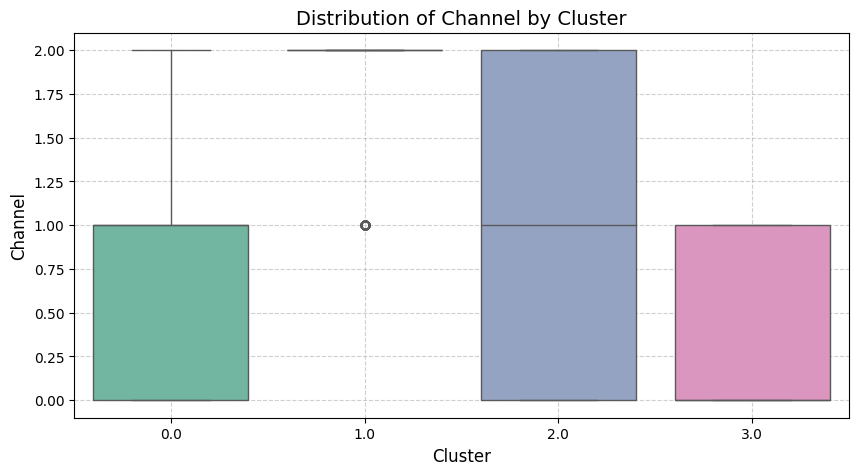

C:\Users\Asus\AppData\Local\Temp\ipykernel_7196\3044150160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_interpretation, palette="Set2")


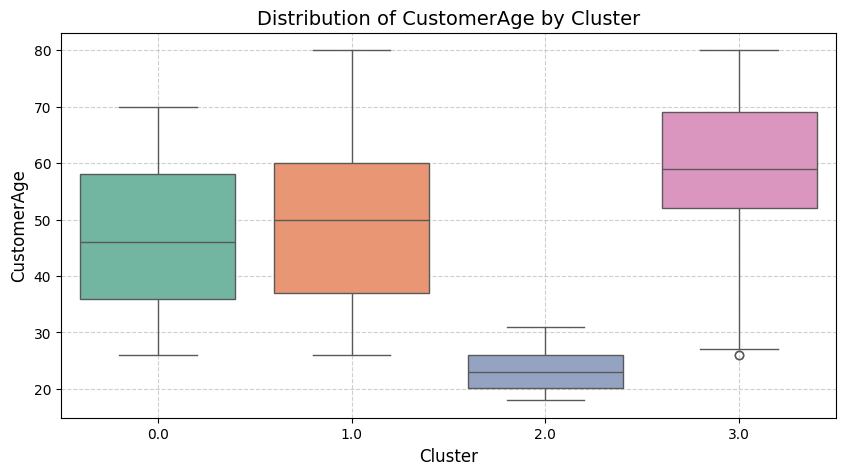

C:\Users\Asus\AppData\Local\Temp\ipykernel_7196\3044150160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_interpretation, palette="Set2")


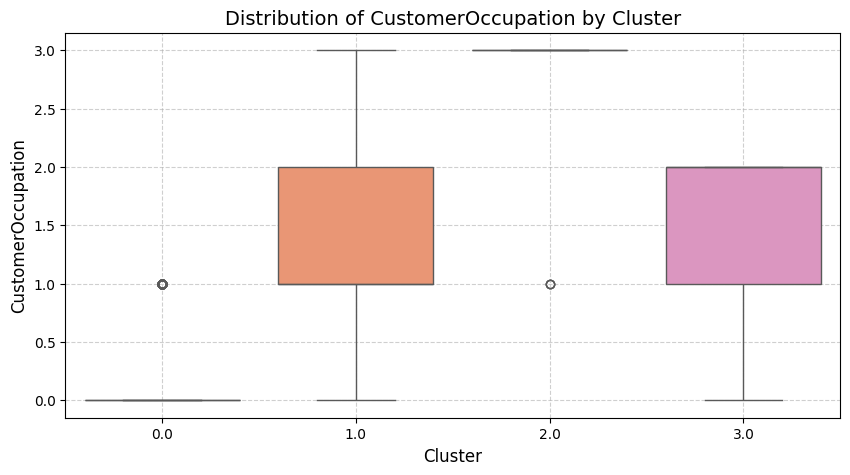

C:\Users\Asus\AppData\Local\Temp\ipykernel_7196\3044150160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_interpretation, palette="Set2")


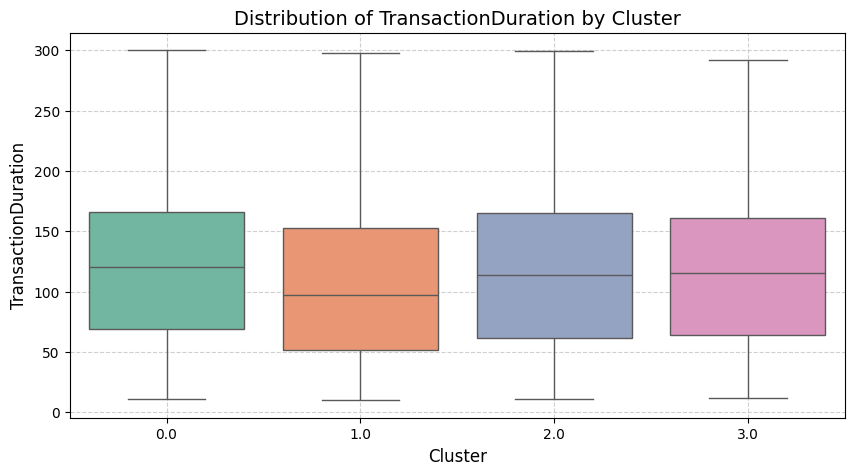

C:\Users\Asus\AppData\Local\Temp\ipykernel_7196\3044150160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_interpretation, palette="Set2")


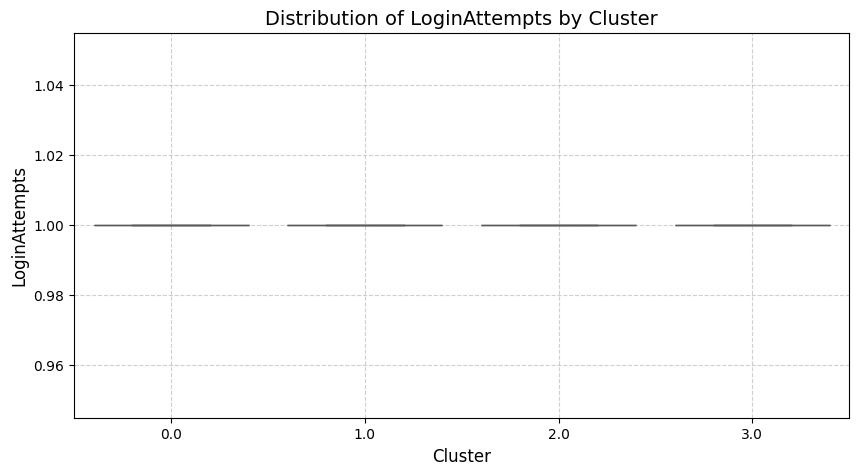

C:\Users\Asus\AppData\Local\Temp\ipykernel_7196\3044150160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_interpretation, palette="Set2")


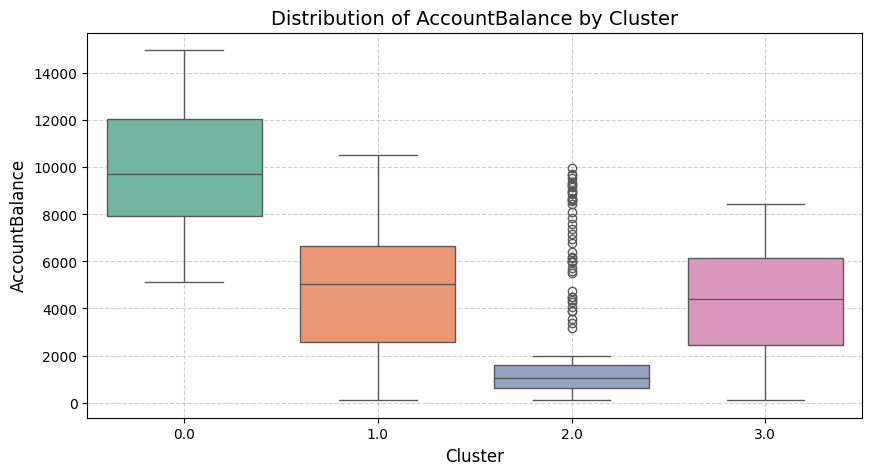

C:\Users\Asus\AppData\Local\Temp\ipykernel_7196\3044150160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_interpretation, palette="Set2")


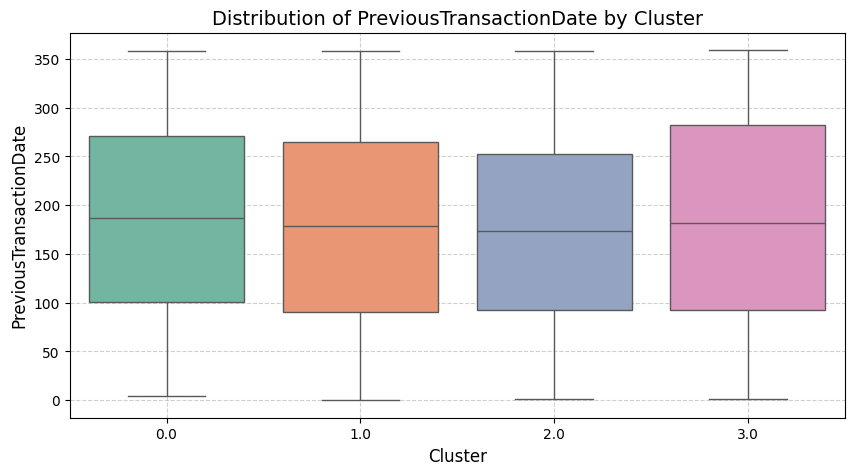


Cluster 0.0: Characteristics
- Rentang Usia Pelanggan: 26 - 70 tahun

       TransactionAmount  TransactionDate  TransactionType    Location  \
count         426.000000       426.000000            426.0  426.000000   
mean          244.910305      1253.664319              1.0   22.446009   
std           213.951936       761.957737              0.0   12.171834   
min             0.450000         3.000000              1.0    0.000000   
25%            77.085000       590.250000              1.0   13.000000   
50%           173.065000      1217.500000              1.0   22.000000   
75%           375.677500      1928.000000              1.0   33.000000   
max           896.790000      2509.000000              1.0   42.000000   

          Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
count  426.000000   426.000000          426.000000           426.000000   
mean     0.685446    46.894366            0.241784           126.326291   
std      0.682297    12.746787       

In [ ]:
# Karakteristik setiap cluster (mean dari fitur numerik)
cluster_summary = df_interpretation.groupby('Cluster')[numerical_cols].mean().round(2)
print("\nCluster Characteristics Summary:\n", cluster_summary)

# Agregasi kategori menggunakan mode
def get_mode(series):
    mode_values = series.mode()
    return mode_values.iloc[0] if not mode_values.empty else 'No Mode'

cluster_categorical_summary = df_interpretation.groupby('Cluster')[categorical_cols].agg(get_mode)
print("\nCluster Categorical Summary:\n", cluster_categorical_summary)

# Visualisasi distribusi fitur numerik dalam tiap cluster
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Cluster', y=col, data=df_interpretation, palette="Set2")
    plt.title(f"Distribution of {col} by Cluster", fontsize=14)
    plt.xlabel("Cluster", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Interpretasi hasil clustering
for cluster in sorted(df_interpretation['Cluster'].unique()):
    print(f"\nCluster {cluster}: Characteristics")
    summary = df_interpretation[df_interpretation['Cluster'] == cluster].describe(include="all")
    
    # Menampilkan rentang usia pelanggan
    if 'CustomerAge' in summary:
        valid_ages = df_interpretation.loc[df_interpretation['Cluster'] == cluster, 'CustomerAge'].dropna()
        if not valid_ages.empty:
            min_age = int(valid_ages.min())
            max_age = int(valid_ages.max())
            print(f"- Rentang Usia Pelanggan: {min_age} - {max_age} tahun\n")
        else:
            print("- Rentang Usia Pelanggan: Data tidak tersedia\n")
    
    print(summary)
    print("\n")

# Analisis Karakteristik Cluster dari Model KMeans

Berdasarkan hasil evaluasi model clustering menggunakan **Elbow Method** dan **Silhouette Score Analysis**, jumlah cluster optimal yang dipilih adalah **4 cluster**. Berikut adalah karakteristik masing-masing cluster berdasarkan analisis fitur utama dalam dataset.

## Cluster 0: Pelanggan Dewasa dengan Saldo Tinggi & Transaksi Stabil
- **Rentang Usia Pelanggan:** 26-70 tahun
- **Rata-rata Jumlah Transaksi (k$):**  244.91
- **Rata-rata Saldo Akun (k$):** 10,048.13
- **Rata-rata Durasi Transaksi:** 126.33 detik
- **Kategori Pekerjaan yang Dominan:** Mayoritas tidak memiliki pekerjaan tetap
- **Lokasi Transaksi yang Sering Digunakan:** Beragam, cenderung di daerah perkotaan
- **Kanal Transaksi yang Sering Digunakan:** Campuran antara offline & online

### Analisis:
  Pelanggan dalam cluster ini memiliki saldo akun yang tinggi dengan transaksi yang cukup stabil. Mereka cenderung lebih matang secara finansial dan lebih jarang melakukan transaksi besar dalam satu waktu. Mereka kemungkinan menggunakan layanan perbankan untuk keperluan tabungan atau investasi.

### Strategi yang Disarankan:
- Menawarkan layanan premium seperti kartu kredit eksklusif atau program investasi.
- Menyediakan opsi perencanaan keuangan atau asuransi untuk meningkatkan loyalitas pelanggan
- Mengembangkan layanan perbankan digital dengan fitur yang mempermudah transaksi rutin.


## Cluster 1: Profesional dengan Saldo Menengah & Transaksi Konsisten
- **Rentang Usia Pelanggan:** 26-80 tahun
- **Rata-rata Jumlah Transaksi (k$):** 251.06
- **Rata-rata Saldo Akun (k$):** 4,832.64
- **Rata-rata Durasi Transaksi (k$):** 109.05 detik
- **Kategori Pekerjaan yang Dominan:** Profesional dan pekerja sektor formal
- **Lokasi Transaksi yang Sering Digunakan:** Area bisnis dan perkantoran
- **Kanal Transaksi yang Sering Digunakan:** Lebih dominan online

### Analisis:
Pelanggan dalam cluster ini memiliki saldo akun menengah dan transaksi yang relatif konsisten. Mereka kemungkinan adalah pekerja profesional atau pengusaha yang memiliki pola transaksi teratur tetapi tidak terlalu besar. Mereka lebih aktif menggunakan layanan digital dibandingkan dengan pelanggan lain.

### Strategi yang Disarankan:
- Menawarkan layanan mobile banking dengan fitur yang lebih fleksibel.
- Mengembangkan program loyalitas berbasis transaksi online seperti cashback atau diskon tagihan.
- Menyediakan akses keuangan berbasis investasi atau kredit usaha bagi pelanggan yang membutuhkan modal tambahan.

## Cluster 2: Generasi Muda dengan Transaksi Tinggi & Saldo Rendah
- **Rentang Usia Pelanggan:** 18-31 tahun
- **Rata-rata Jumlah Transaksi (k$):** 258.34
- **Rata-rata Saldo Akun (k$):** 1,543.06
- **Rata-rata Durasi Transaksi (k$):** 120.45 detik
- **Kategori Pekerjaan yang Dominan:** Mayoritas mahasiswa atau pekerja lepas
- **Lokasi Transaksi yang Sering Digunakan:** Wilayah perkotaan dan suburban
- **Kanal Transaksi yang Sering Digunakan:** Campuran offline & online

### Analisis:
Cluster ini terdiri dari pelanggan muda yang memiliki frekuensi transaksi tinggi tetapi saldo akun yang relatif rendah. Mereka lebih sering menggunakan akun untuk kebutuhan sehari-hari dibandingkan untuk tabungan atau investasi.

### Strategi yang Disarankan:
- Menawarkan program cashback atau diskon untuk transaksi tertentu guna meningkatkan loyalitas pelanggan muda.
- Menyediakan layanan tabungan dengan fitur fleksibel untuk menarik minat generasi muda.
- Mengembangkan aplikasi keuangan yang memungkinkan budgeting dan manajemen keuangan yang lebih mudah.

## Cluster 3:Pelanggan Lansia dengan Saldo Menengah & Transaksi Stabil
- **Rentang Usia Pelanggan:** 26-80 tahun
- **Rata-rata Jumlah Transaksi (k$):** 246.64
- **Rata-rata Saldo Akun (k$):** 4,327.08
- **Rata-rata Durasi Transaksi (k$):** 119.27 detik
- **Kategori Pekerjaan yang Dominan:** Mayoritas pensiunan atau pekerja sektor informal
- **Lokasi Transaksi yang Sering Digunakan:** Daerah perkotaan dan suburban
- **Kanal Transaksi yang Sering Digunakan:** Lebih dominan offline

### Analisis:
  Cluster ini mencakup pelanggan dengan saldo akun menengah dan transaksi yang cukup aktif. Mereka kemungkinan adalah pelaku usaha kecil atau pekerja mandiri yang menggunakan rekening untuk bisnis. Bank dapat menawarkan kredit usaha mikro atau layanan keuangan berbasis bisnis untuk segmen ini.

### Strategi yang Disarankan:
- Menawarkan produk tabungan jangka panjang atau layanan pensiun.
- Menyediakan layanan perbankan dengan kemudahan akses bagi pelanggan yang kurang terbiasa dengan teknologi
- Meningkatkan layanan customer service untuk memberikan bantuan lebih personal dalam mengelola transaksi.

---

##  Kesimpulan dan Strategi Bisnis

1. **Cluster 0 (Dewasa dengan Saldo Tinggi):** Tawarkan produk investasi dan layanan premium untuk meningkatkan engagement.
2. **Cluster 1 (Profesional dengan Saldo Menengah):** Fokus pada pengembangan fitur mobile banking dan layanan investasi.
3. **Cluster 2 (Generasi Muda & Transaksi Tinggi):** Berikan insentif seperti cashback dan fitur budgeting yang menarik.
4. **Cluster 3 (Lansia & Transaksi Stabil):** Sediakan layanan perbankan dengan kemudahan akses dan program pensiun.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [12]:
output_path = "bank_transactions_clustered.csv"
df.to_csv(output_path, index=False)

print(f"Hasil clustering telah disimpan dalam file: {output_path}")

Hasil clustering telah disimpan dalam file: bank_transactions_clustered.csv
